In [1]:
# !pip install doclayout-yolo==0.0.4

C:\Users\Tommy\anaconda3\envs\MultiModel_Analysis\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



image 1/1 D:\pycharmProjects\File-Multimodel-Analysis\Test\layout_test_image.png: 736x1024 2 titles, 4 plain texts, 3 abandons, 3 figures, 2 tables, 1 table_caption, 2 table_footnotes, 71.2ms
Speed: 11.0ms preprocess, 71.2ms inference, 108.4ms postprocess per image at shape (1, 3, 736, 1024)
plain text      [71, 779, 467, 934], conf=0.98
plain text      [71, 91, 1406, 168], conf=0.97
title           [72, 285, 629, 320], conf=0.94
plain text      [71, 178, 1406, 256], conf=0.93
table           [71, 384, 410, 687], conf=0.93
abandon         [71, 983, 201, 998], conf=0.91
abandon         [1386, 981, 1404, 996], conf=0.88
table_footnote  [71, 700, 408, 732], conf=0.87
table           [452, 385, 864, 688], conf=0.79
title           [71, 750, 226, 773], conf=0.77
plain text      [71, 330, 397, 373], conf=0.73
table_footnote  [511, 922, 1352, 955], conf=0.63
table_caption   [452, 359, 566, 376], conf=0.58
figure          [860, 278, 1412, 770], conf=0.43
abandon         [511, 922, 1352, 955],

(np.float64(-0.5), np.float64(1479.5), np.float64(1047.5), np.float64(-0.5))

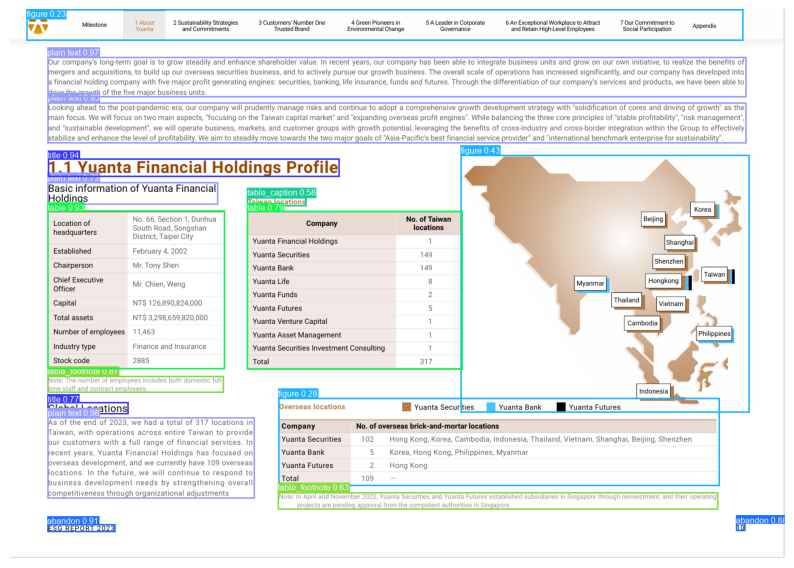

In [2]:
import torch
from doclayout_yolo.models import YOLOv10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

model = YOLOv10("../Tools/doclayout_yolo_docstructbench_imgsz1024.pt")

# 5. 检测布局
det_res = model.predict(
    'layout_test_image.png',   # Image to predict
    imgsz=1024,        # Prediction image size
    conf=0.2,          # Confidence threshold
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu")    # Device to use (e.g., 'cuda:0' or 'cpu')
)
res = det_res[0]  # 处理第一张

# 6. 输出坐标、类别、置信度
for box in res.boxes.data.cpu().numpy():
    x1, y1, x2, y2, conf, cls_id = box
    cls_name = res.names[int(cls_id)]
    print(f"{cls_name:<15} [{int(x1)}, {int(y1)}, {int(x2)}, {int(y2)}], conf={conf:.2f}")

annotated = res.plot(pil=True, line_width=3, font_size=16)

# 8. 显示图像
plt.figure(figsize=(10,12))
plt.imshow(annotated)
plt.axis("off")

In [4]:
#save picture

# arr = np.array(annotated)[:, :, ::-1]  # PIL 是 RGB，OpenCV 用 BGR 顺序
# saveOrNot=cv2.imwrite("annotated_page1.jpg", arr, [cv2.IMWRITE_JPEG_QUALITY, 90])

150

0: 1024x1024 1 title, 1 plain text, 1 abandon, 1 figure, 6061.4ms
1: 1024x1024 12 titles, 15 plain texts, 2 abandons, 6 figures, 6061.4ms
2: 1024x1024 8 titles, 9 plain texts, 7 abandons, 1 figure, 6061.4ms
3: 1024x1024 4 titles, 13 plain texts, 2 abandons, 2 figures, 6061.4ms
4: 1024x1024 4 titles, 12 plain texts, 2 abandons, 2 figures, 6061.4ms
5: 1024x1024 5 titles, 5 plain texts, 3 abandons, 1 figure, 1 table_footnote, 6061.4ms
6: 1024x1024 2 titles, 2 plain texts, 3 abandons, 1 figure, 1 figure_caption, 1 table, 1 table_caption, 6061.4ms
7: 1024x1024 3 titles, 4 plain texts, 3 abandons, 1 figure, 1 figure_caption, 2 tables, 1 table_caption, 6061.4ms
8: 1024x1024 1 title, 1 plain text, 3 abandons, 1 figure, 1 table, 1 table_caption, 1 table_footnote, 6061.4ms
9: 1024x1024 1 plain text, 4 abandons, 5 tables, 5 table_captions, 2 table_footnotes, 6061.4ms
10: 1024x1024 9 titles, 13 plain texts, 3 abandons, 6 figures, 6061.4ms
11: 1024x1024 13 titles, 16 plain texts, 4 abandons, 5